Enter start date (YYYY-MM-DD): 2021-01-01
Enter end date (YYYY-MM-DD): 2022-01-01


[*********************100%***********************]  1 of 1 completed


Data saved to RELIANCE_data.csv


[*********************100%***********************]  1 of 1 completed


Data saved to TCS_data.csv


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Data saved to HDFCBANK_data.csv


Data saved to INFY_data.csv
Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - close_output_loss: 0.2863 - loss: 0.3679 - volume_output_loss: 0.0801
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - close_output_loss: 0.1302 - loss: 0.1706 - volume_output_loss: 0.0403
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - close_output_loss: 0.0387 - loss: 0.0608 - volume_output_loss: 0.0217
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - close_output_loss: 0.0353 - loss: 0.0508 - volume_output_loss: 0.0153
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - close_output_loss: 0.0172 - loss: 0.0375 - volume_output_loss: 0.0203
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - close_output_loss: 0.0177 - loss: 0.0330 - volume_output_loss: 0.0151
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - close_output_loss: 0.0159 - loss: 0.0276 - volume_output_loss: 0.0113
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - close_output_loss: 0.0131 - loss: 0.0266 - volume_output_loss: 0.0139
Epoc

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
Predictions saved to HDFCBANK_predictions.csv
Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - close_output_loss: 0.4904 - loss: 0.5206 - volume_output_loss: 0.0295
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - close_output_loss: 0.2432 - loss: 0.2720 - volume_output_loss: 0.0263
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - close_output_loss: 0.0689 - loss: 0.0858 - volume_output_loss: 0.0164
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - close_output_loss: 0.0154 - loss: 0.0432 - volume_output_loss: 0.0276
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - close_output_loss: 0.0166 - loss: 0.0343 - volume_output_loss: 0.0175
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - close_output_loss: 0.0066 - loss: 0.0278 - volume_output_loss: 0.0214
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - close_output_loss: 0.0091 - loss: 0.0259 - volume_output_loss: 0.0169
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - close_output_loss

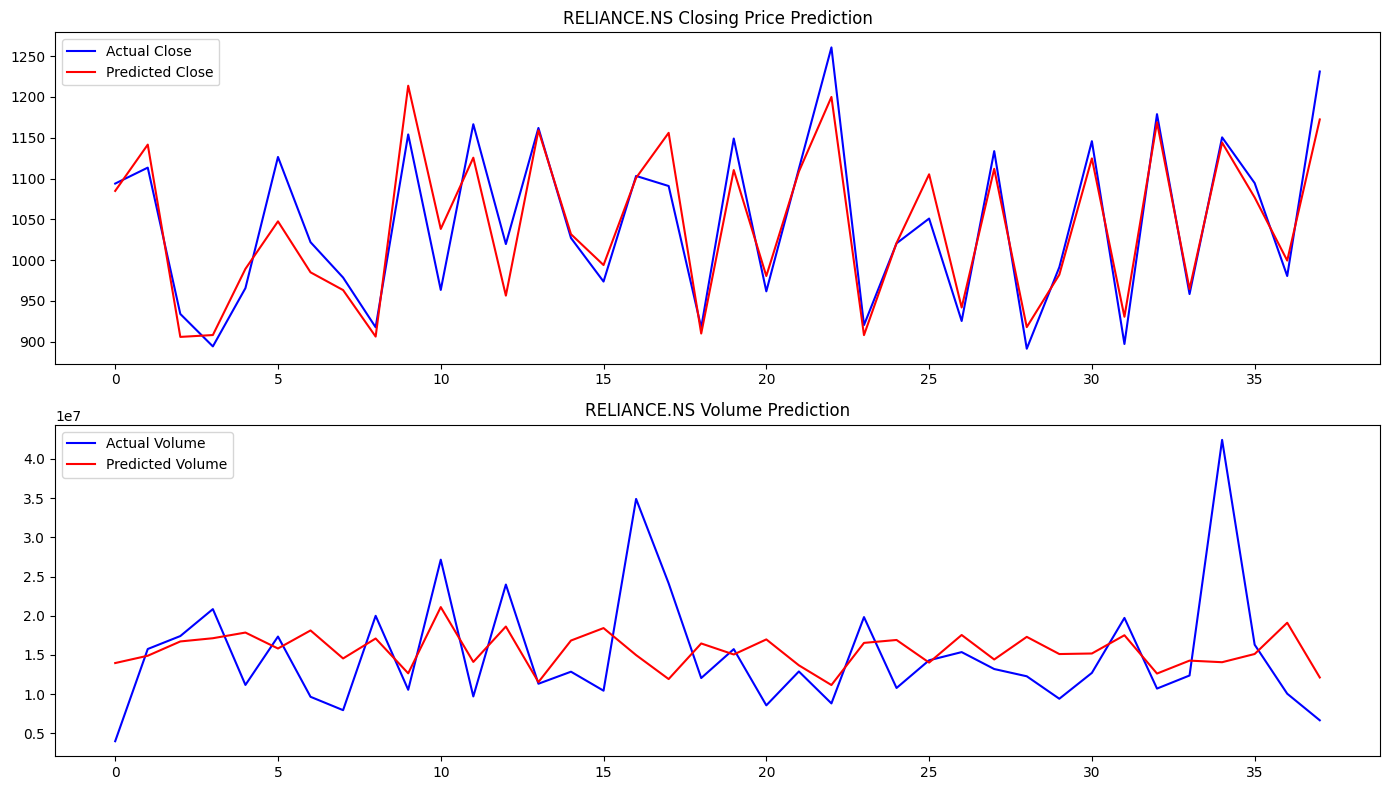

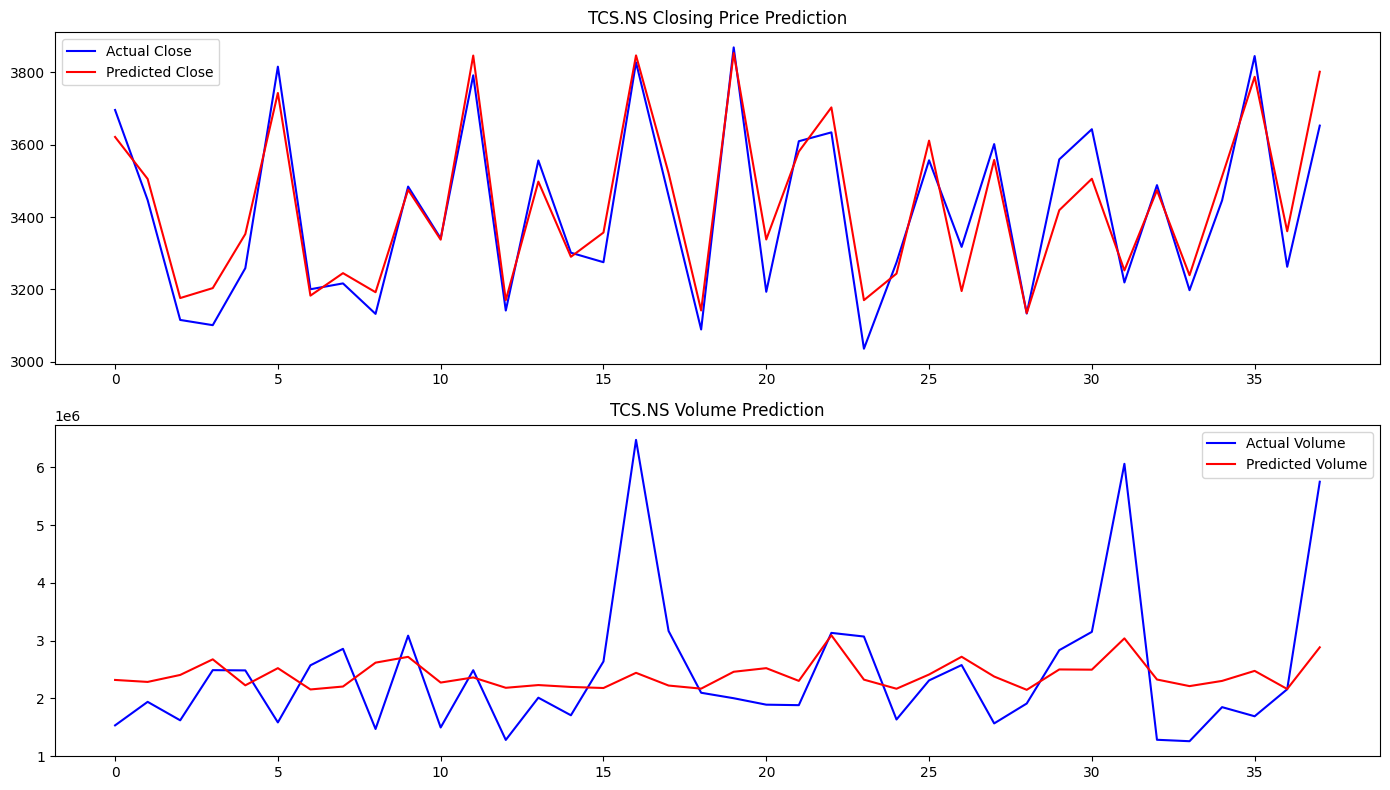

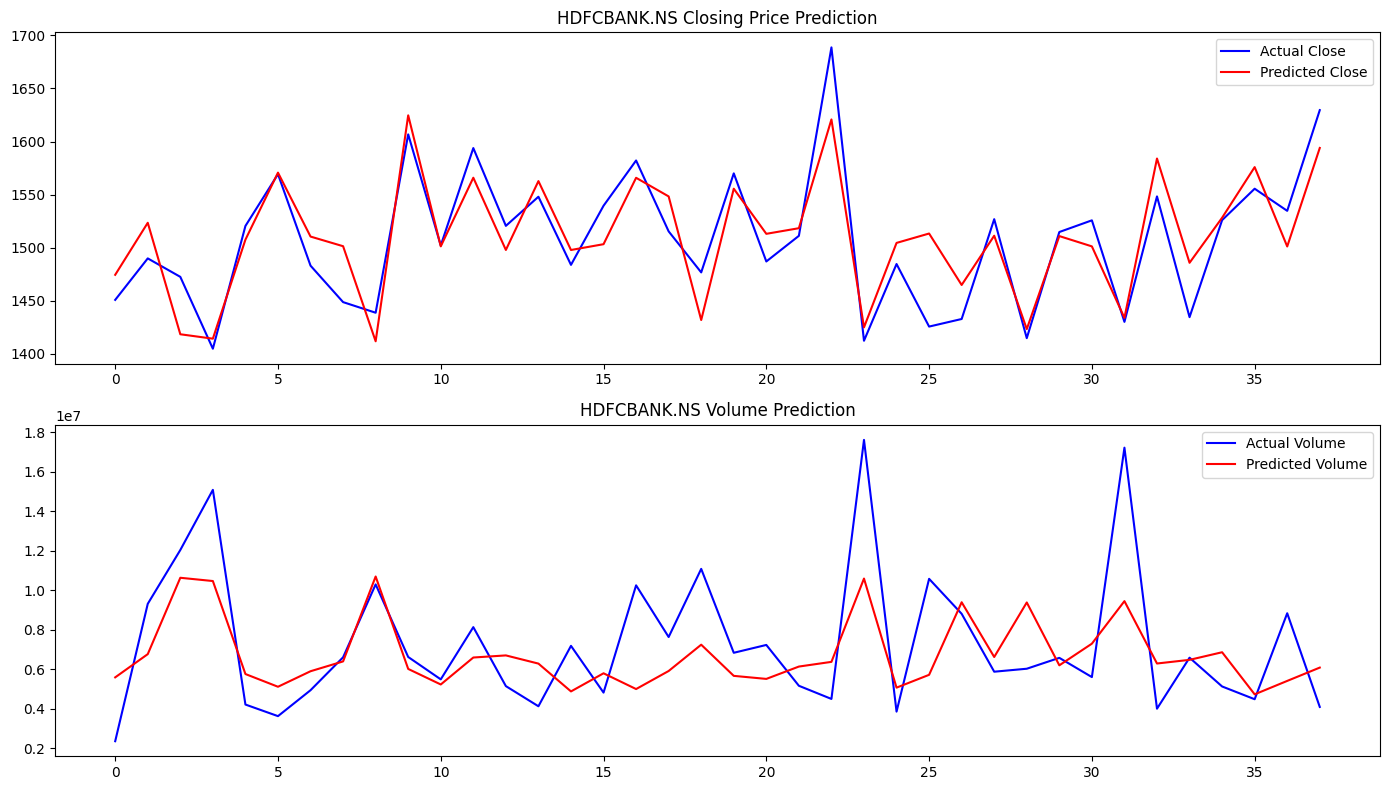

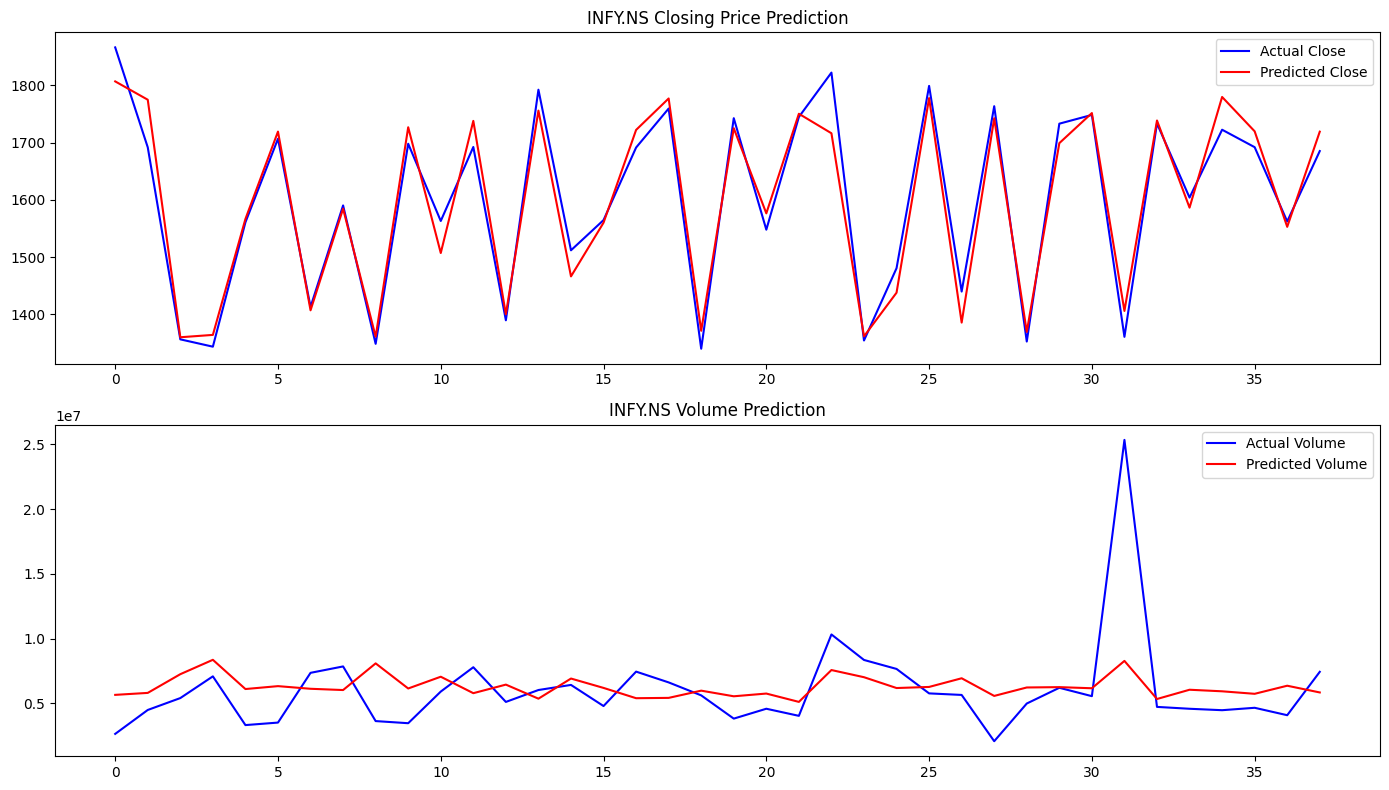

Metrics for RELIANCE.NS:
Closing Price -> MAE: 26.88, MSE: 1209.62, RMSE: 34.78, R²: 0.88, DA: 94.59%
Volume        -> MAE: 5167332.24, MSE: 56277998884586.29, RMSE: 7501866.36, R²: 0.01, DA: 59.46%
Metrics for TCS.NS:
Closing Price -> MAE: 61.44, MSE: 5530.20, RMSE: 74.37, R²: 0.91, DA: 94.59%
Volume        -> MAE: 741078.51, MSE: 1226090606993.85, RMSE: 1107289.76, R²: 0.17, DA: 67.57%
Metrics for HDFCBANK.NS:
Closing Price -> MAE: 25.61, MSE: 1007.96, RMSE: 31.75, R²: 0.75, DA: 91.89%
Volume        -> MAE: 2100280.66, MSE: 7642389676052.22, RMSE: 2764487.24, R²: 0.40, DA: 62.16%
Metrics for INFY.NS:
Closing Price -> MAE: 28.17, MSE: 1323.18, RMSE: 36.38, R²: 0.95, DA: 94.59%
Volume        -> MAE: 2003887.84, MSE: 10962023618090.62, RMSE: 3310894.69, R²: 0.16, DA: 59.46%


In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Dense, Input

# Sensex tickers
sensex_tickers = ["RELIANCE.NS", "TCS.NS", "HDFCBANK.NS", "INFY.NS"]

# Get date inputs
start_date = input("Enter start date (YYYY-MM-DD): ")
end_date = input("Enter end date (YYYY-MM-DD): ")

# Download stock data
def download_data(ticker):
    print(f"Downloading data for {ticker}...")
    data = yf.download(ticker, start=start_date, end=end_date)
    if not data.empty:
        filename = f"{ticker.replace('.NS', '')}_data.csv"
        data.to_csv(filename)
        print(f"Data saved to {filename}")
        return data
    else:
        print(f"No data available for {ticker}")
        return None

# Fetch data for all tickers
stock_data = {}
for ticker in sensex_tickers:
    data = download_data(ticker)
    if data is not None:
        stock_data[ticker] = data

# Preprocess data for both closing price and volume
def preprocess_data(data, look_back=60):
    scaler_close = MinMaxScaler(feature_range=(0, 1))
    scaler_volume = MinMaxScaler(feature_range=(0, 1))

    # Scale close and volume data
    data_close = scaler_close.fit_transform(data[['Close']])
    data_volume = scaler_volume.fit_transform(data[['Volume']])

    X, y_close, y_volume = [], [], []
    for i in range(look_back, len(data_close)):
        X.append(np.hstack((data_close[i-look_back:i, 0].reshape(-1, 1),
                            data_volume[i-look_back:i, 0].reshape(-1, 1))))
        y_close.append(data_close[i, 0])
        y_volume.append(data_volume[i, 0])

    X = np.array(X)
    y_close = np.array(y_close)
    y_volume = np.array(y_volume)

    return X, y_close, y_volume, scaler_close, scaler_volume

# Preprocess all stock data
preprocessed_data = {}
for ticker, data in stock_data.items():
    X, y_close, y_volume, scaler_close, scaler_volume = preprocess_data(data)
    preprocessed_data[ticker] = (X, y_close, y_volume, scaler_close, scaler_volume)

# Build LSTM model
def build_lstm_model(input_shape):
    inputs = Input(shape=input_shape)
    x = LSTM(50, return_sequences=False)(inputs)
    out_close = Dense(1, name="close_output")(x)
    out_volume = Dense(1, name="volume_output")(x)

    model = Model(inputs=inputs, outputs=[out_close, out_volume])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train and predict
def train_and_predict(ticker, X, y_close, y_volume, scaler_close, scaler_volume, epochs=20, batch_size=32):
    # Train-test split
    X_train, X_test, y_close_train, y_close_test, y_volume_train, y_volume_test = train_test_split(
        X, y_close, y_volume, test_size=0.2, random_state=42)

    # Build and train the model
    model = build_lstm_model((X_train.shape[1], X_train.shape[2]))
    model.fit(X_train, [y_close_train, y_volume_train], epochs=epochs, batch_size=batch_size, verbose=1)

    # Predictions
    y_close_pred, y_volume_pred = model.predict(X_test)
    y_close_pred = scaler_close.inverse_transform(y_close_pred)
    y_volume_pred = scaler_volume.inverse_transform(y_volume_pred.reshape(-1, 1))

    y_close_test = scaler_close.inverse_transform(y_close_test.reshape(-1, 1))
    y_volume_test = scaler_volume.inverse_transform(y_volume_test.reshape(-1, 1))

    # Save predictions
    result_df = pd.DataFrame({
        "Actual_Close": y_close_test.flatten(),
        "Predicted_Close": y_close_pred.flatten(),
        "Actual_Volume": y_volume_test.flatten(),
        "Predicted_Volume": y_volume_pred.flatten()
    })
    result_filename = f"{ticker.replace('.NS', '')}_predictions.csv"
    result_df.to_csv(result_filename, index=False)
    print(f"Predictions saved to {result_filename}")

    return result_df

# Train and predict for all tickers
results = {}
for ticker, (X, y_close, y_volume, scaler_close, scaler_volume) in preprocessed_data.items():
    results[ticker] = train_and_predict(ticker, X, y_close, y_volume, scaler_close, scaler_volume)

# Plot predictions
def plot_predictions(ticker, result_df):
    plt.figure(figsize=(14, 8))

    # Plot Closing Price
    plt.subplot(2, 1, 1)
    plt.plot(result_df["Actual_Close"], color="blue", label="Actual Close")
    plt.plot(result_df["Predicted_Close"], color="red", label="Predicted Close")
    plt.title(f"{ticker} Closing Price Prediction")
    plt.legend()

    # Plot Volume
    plt.subplot(2, 1, 2)
    plt.plot(result_df["Actual_Volume"], color="blue", label="Actual Volume")
    plt.plot(result_df["Predicted_Volume"], color="red", label="Predicted Volume")
    plt.title(f"{ticker} Volume Prediction")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot predictions for all tickers
for ticker, result_df in results.items():
    plot_predictions(ticker, result_df)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Directional Accuracy calculation
def calculate_da(actual, predicted):
    actual_direction = np.sign(np.diff(actual.flatten()))
    predicted_direction = np.sign(np.diff(predicted.flatten()))
    correct_directions = (actual_direction == predicted_direction).sum()
    total_directions = len(actual_direction)
    return (correct_directions / total_directions) * 100

# Function to compute all metrics
def calculate_metrics(ticker, result_df):
    metrics = {}

    # Closing Price Metrics
    actual_close = result_df["Actual_Close"].values
    predicted_close = result_df["Predicted_Close"].values

    metrics["close_mae"] = mean_absolute_error(actual_close, predicted_close)
    metrics["close_mse"] = mean_squared_error(actual_close, predicted_close)
    metrics["close_rmse"] = np.sqrt(metrics["close_mse"])
    metrics["close_r2"] = r2_score(actual_close, predicted_close)
    metrics["close_da"] = calculate_da(actual_close, predicted_close)

    # Volume Metrics
    actual_volume = result_df["Actual_Volume"].values
    predicted_volume = result_df["Predicted_Volume"].values

    metrics["volume_mae"] = mean_absolute_error(actual_volume, predicted_volume)
    metrics["volume_mse"] = mean_squared_error(actual_volume, predicted_volume)
    metrics["volume_rmse"] = np.sqrt(metrics["volume_mse"])
    metrics["volume_r2"] = r2_score(actual_volume, predicted_volume)
    metrics["volume_da"] = calculate_da(actual_volume, predicted_volume)

    # Print metrics
    print(f"Metrics for {ticker}:")
    print(f"Closing Price -> MAE: {metrics['close_mae']:.2f}, MSE: {metrics['close_mse']:.2f}, RMSE: {metrics['close_rmse']:.2f}, R²: {metrics['close_r2']:.2f}, DA: {metrics['close_da']:.2f}%")
    print(f"Volume        -> MAE: {metrics['volume_mae']:.2f}, MSE: {metrics['volume_mse']:.2f}, RMSE: {metrics['volume_rmse']:.2f}, R²: {metrics['volume_r2']:.2f}, DA: {metrics['volume_da']:.2f}%")

    return metrics

# Calculate and print metrics for all tickers
all_metrics = {}
for ticker, result_df in results.items():
    all_metrics[ticker] = calculate_metrics(ticker, result_df)